Sampling of multivariate random variables

Step 1. Choose variables for sampling from your dataset (overall – about 10 variables, 3-4 – target variables, the rest - predictors).

Step 2. Using univariate parametric distributions that were fitted in Lab#2 make sampling of chosen target variables. Use for these 2 different sampling methods.

Step 3. Estimate relations between predictors and chosen target variables. At least, they should have significant correlation coefficients.

Step 4. Build a Bayesian network for chosen set of variables. Choose its structure on the basis of multivariate analysis and train distributions in nodes using chosen algorithm.

Step 5. Build a Bayesian network for the same set of variables but using 2 chosen algorithms for structural learning.

Step 6. Analyze a quality of sampled target variables from the point of view of problem statement (e.g. prediction, gap filling, synthetic generation).

Table of contents:

1. Substantiation of chosen sampling.

2. Sampling of chosen target variables using univariate parametric distributions (from practice #2) with 2 different sampling methods.

3. Estimation of relations between predictors and chosen target variables.

4. Bayesian network

5. Quality analysis.

## Step 1. Choose variables for sampling from your dataset (overall – about 10 variables, 3-4 – target variables, the rest - predictors)

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
file = r'spotify_dataset.csv'
data = pd.read_csv(file)
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:

variables = 'Energy	Loudness Valence Speechiness Acousticness Tempo Streams'
variables = variables.split()
variables.append('Artist Followers')
variables.append('Number of Times Charted')

predictors = variables.copy()

targets = 'Popularity Danceability '
targets = targets.split()
targets.append('Highest Charting Position')
for target in targets: variables.append(target) 

N = len(data)
subdata = data[variables]
subdata = subdata[:N]
subdata

,Energy,Loudness,Valence,Speechiness,Acousticness,Tempo,Streams,Artist Followers,Number of Times Charted,Popularity,Danceability,Highest Charting Position
0,0.8,-4.808,0.589,0.0504,0.127,134.002,"48,633,449",3377762,8,100,0.714,1
1,0.764,-5.484,0.478,0.0483,0.0383,169.928,"47,248,719",2230022,3,99,0.591,2
2,0.664,-5.044,0.688,0.154,0.335,166.928,"40,162,559",6266514,11,99,0.563,1
3,0.897,-3.712,0.591,0.0348,0.0469,126.026,"37,799,456",83293380,5,98,0.808,3
4,0.704,-7.409,0.894,0.0615,0.0203,149.995,"33,948,454",5473565,1,96,0.736,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.7,-6.021,0.608,0.0694,0.00261,116.073,"4,630,675",27167675,1,79,0.762,195
1552,0.87,-3.123,0.714,0.0851,0.24,152.37,"4,623,030",15019109,1,66,0.528,196
1553,0.523,-4.333,0.394,0.03,0.184,104.988,"4,620,876",22698747,1,81,0.765,197
1554,0.55,-7.026,0.881,0.0587,0.249,154.064,"4,607,385",208630,1,60,0.832,198


## Step 2. Using univariate parametric distributions that were fitted in Lab#2 make sampling of chosen target variables. Use for these 2 different sampling methods.

In [4]:
print(subdata['Streams'])
subdata['Streams'] = pd.to_numeric(subdata['Streams'].str.replace(',',''), errors='coerce')
print(subdata['Streams'])

0       48,633,449
1       47,248,719
2       40,162,559
3       37,799,456
4       33,948,454
           ...    
1551     4,630,675
1552     4,623,030
1553     4,620,876
1554     4,607,385
1555     4,595,450
Name: Streams, Length: 1556, dtype: object
0       48633449
1       47248719
2       40162559
3       37799456
4       33948454
          ...   
1551     4630675
1552     4623030
1553     4620876
1554     4607385
1555     4595450
Name: Streams, Length: 1556, dtype: int64


In [5]:
for col in subdata.columns:
    subdata[col] = pd.to_numeric(subdata[col], errors='coerce')
    subdata[col].fillna(subdata[col].mean(), inplace=True, downcast='infer')

subdata.dtypes

Energy                       float64
Loudness                     float64
Valence                      float64
Speechiness                  float64
Acousticness                 float64
Tempo                        float64
Streams                        int64
Artist Followers             float64
Number of Times Charted        int64
Popularity                   float64
Danceability                 float64
Highest Charting Position      int64
dtype: object

In [6]:
def plot_pdf_estimated(data, cols=2, kde=True,hist=True,figsize=(10,10)):
    plt.figure(figsize=figsize)
    for i,col in enumerate(data.columns):
        m = 1 + 3.32*np.log10(len(data))
        m = int(np.round(m))
        N_cols = len(data.columns)
        plt.subplot(N_cols-cols+1,cols,i+1)
        
        if hist:
            data[col].hist(density=True,stacked=True,bins=m)

        if kde:
            kernel = scipy.stats.gaussian_kde(data[col])
            min_amount, max_amount = data[col].min(), data[col].max()
            x = np.linspace(min_amount, max_amount, len(data[col]))
            kde_values = kernel(x)
            plt.plot(x,kde_values)

        plt.grid(True)
        plt.title(col)
    plt.tight_layout()
    

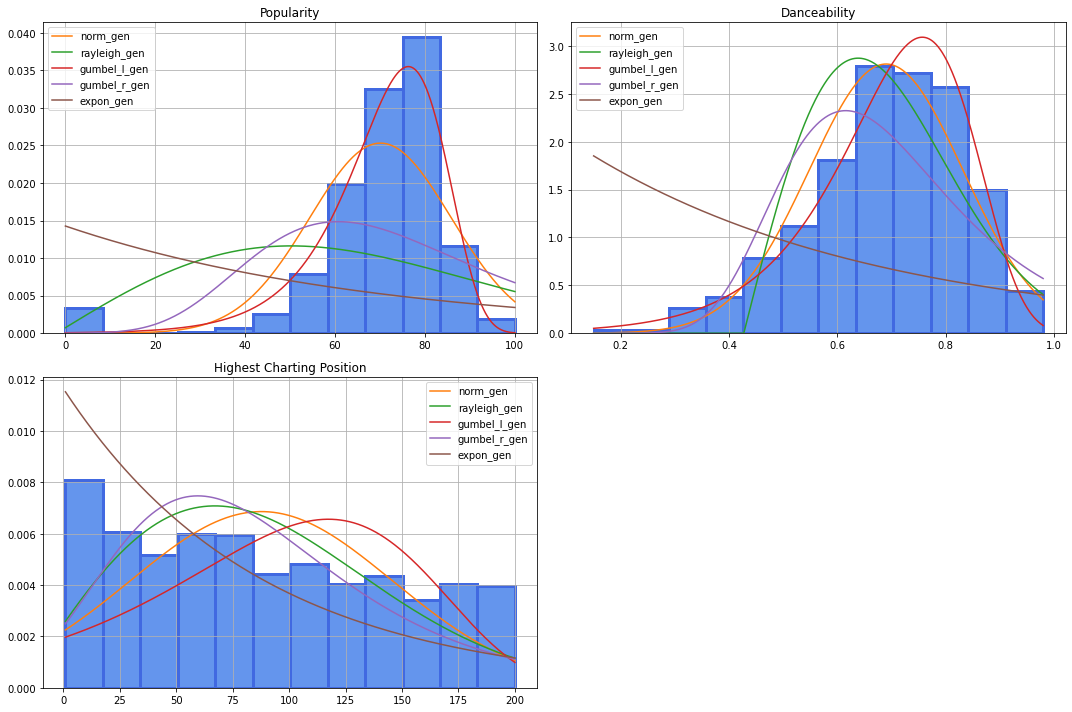

In [7]:
from scipy.stats.distributions import norm, rayleigh, gumbel_l, gumbel_r, expon
distributions = [norm, rayleigh, gumbel_l, gumbel_r, expon]

def MLE_density(data,distributions,cols = 2):
    plt.figure(figsize=(15,10))
    N_cols = len(data.columns)
    for i, col in enumerate(data.columns):
        m = 1 + 3.32*np.log10(len(data))
        m = int(np.round(m))
        min_amount, max_amount = data[col].min(), data[col].max()
        x = np.linspace(min_amount, max_amount, len(data[col]))
        
        plt.subplot(N_cols-cols+1,cols,i+1)
        data[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)

        for dist in distributions:
            MLE_params = dist.fit(data[col])
            vals = dist.pdf(x,*MLE_params)
            plt.plot(x,vals,label=dist.__class__.__name__)

        plt.grid(True)
        plt.title(col)
        plt.legend()
    plt.tight_layout()

MLE_density(subdata[targets],distributions)

plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

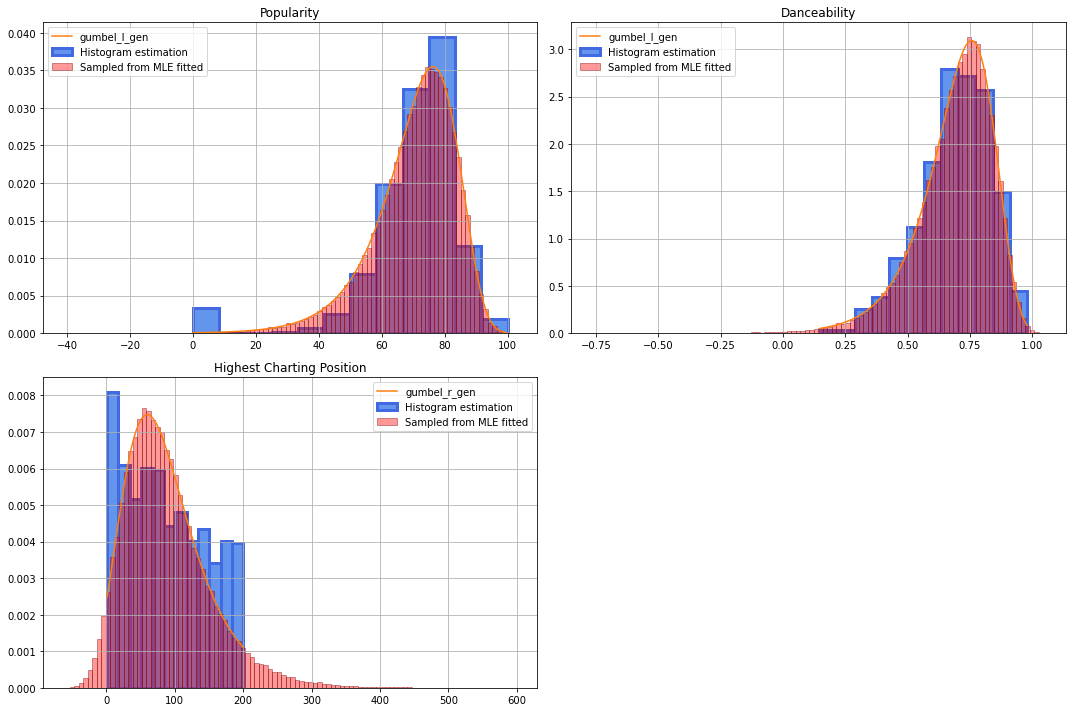

In [8]:
from scipy.stats.distributions import norm, rayleigh, gumbel_l, gumbel_r, expon
distributions = [gumbel_l,gumbel_l,gumbel_r]


def inverse_transform_sampling(data,distributions,cols = 2):
    plt.figure(figsize=(15,10))
    N_cols = len(data.columns)
    for i, col in enumerate(data.columns):
        min_value, max_value = data[col].min(), data[col].max()
        x = np.linspace(min_value, max_value, len(data[col]))
        
        plt.subplot(N_cols-cols+1,cols,i+1)

        m = 1 + 3.32*np.log10(len(data))
        m = int(np.round(m))
        data[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3, label='Histogram estimation')

        dist = distributions[i]
        MLE_params = dist.fit(data[col])
        vals = dist.pdf(x,*MLE_params)
        plt.plot(x,vals,label=dist.__class__.__name__)

        N = 100000
        samples = dist.ppf(np.random.uniform(0, 1, size=(N,)),*MLE_params)

        plt.hist(samples, bins=100, density=True,alpha=0.4, facecolor='red', edgecolor='maroon', label='Sampled from MLE fitted')
        # print(samples)
        plt.grid(True)
        plt.title(col)
        plt.legend()
    plt.tight_layout()

inverse_transform_sampling(subdata[targets],distributions)

plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



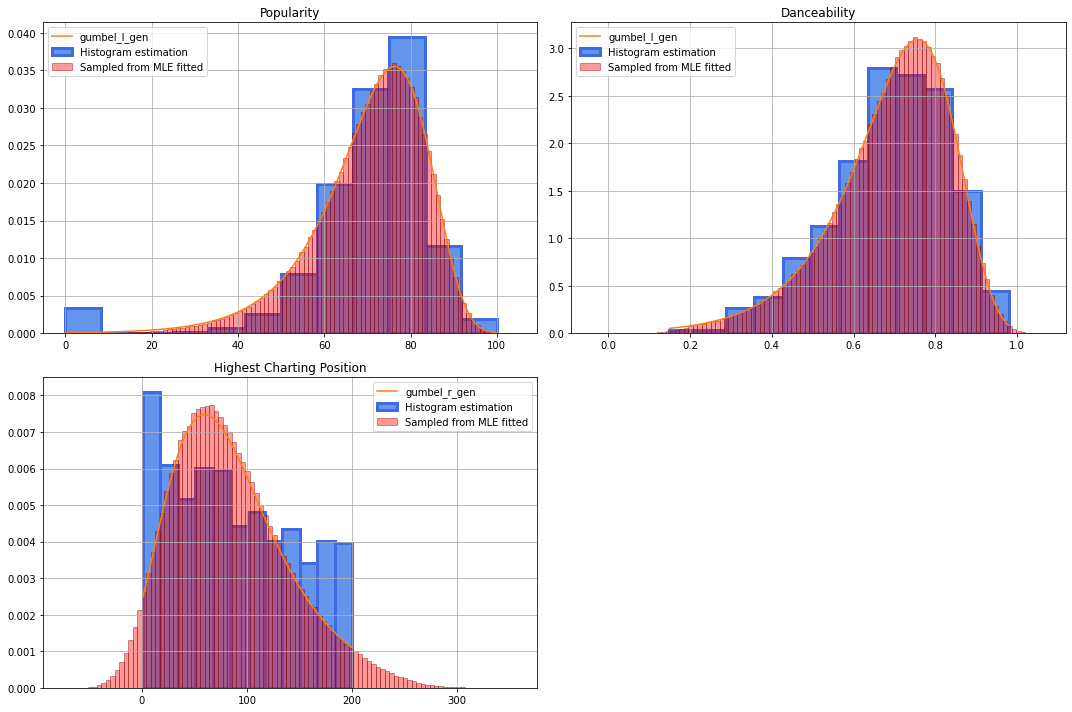

In [9]:
from scipy.stats.distributions import norm, rayleigh, gumbel_l, gumbel_r, uniform
distributions = [gumbel_l,gumbel_l,gumbel_r]


def accept_reject_sampling(data,distributions,cols = 2):
    plt.figure(figsize=(15,10))
    N_cols = len(data.columns)
    for i, col in enumerate(data.columns):
        min_value, max_value = data[col].min(), data[col].max()
        x = np.linspace(min_value, max_value, len(data[col]))
        
        plt.subplot(N_cols-cols+1,cols,i+1)

        m = 1 + 3.32*np.log10(len(data))
        m = int(np.round(m))
        data[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3, label='Histogram estimation')

        dist = distributions[i]
        MLE_params = dist.fit(data[col])
        vals = dist.pdf(x,*MLE_params)
        plt.plot(x,vals,label=dist.__class__.__name__)

        N = 10000000
        S = 10
        candidates = np.random.normal(data[col].mean(), data[col].std(), size=(N,))
        prob_accept = dist.pdf(candidates,*MLE_params) / (S*norm.pdf(candidates,data[col].mean(), data[col].std()) + 1e-3)
        mask = np.random.random(size=(N,)) < prob_accept
        samples = candidates[mask]

        plt.hist(samples, bins=100, density=True,alpha=0.4, facecolor='red', edgecolor='maroon', label='Sampled from MLE fitted')
        # print(samples)
        plt.grid(True)
        plt.title(col)
        plt.legend()
    plt.tight_layout()

accept_reject_sampling(subdata[targets],distributions)
plt.savefig(fname = "./3.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



## Step 3. Estimate relations between predictors and chosen target variables. At least, they should have significant correlation coefficients.


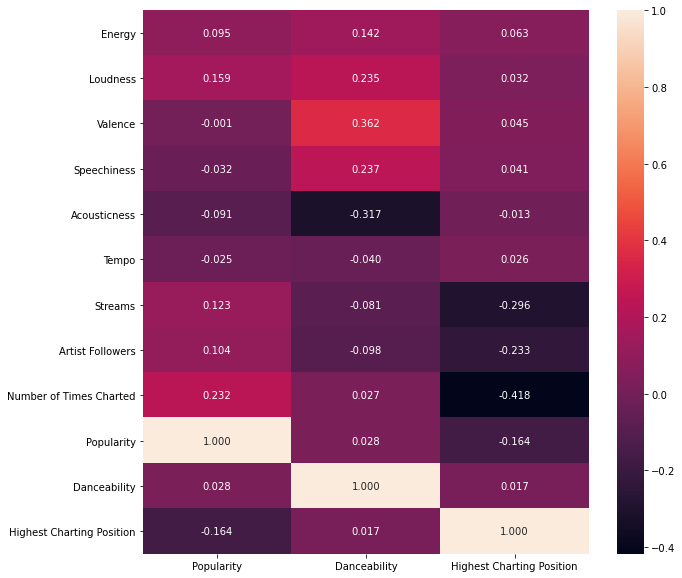

In [10]:
corr = subdata.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[targets], annot=True, fmt= '.3f')

plt.savefig(fname = "./4.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

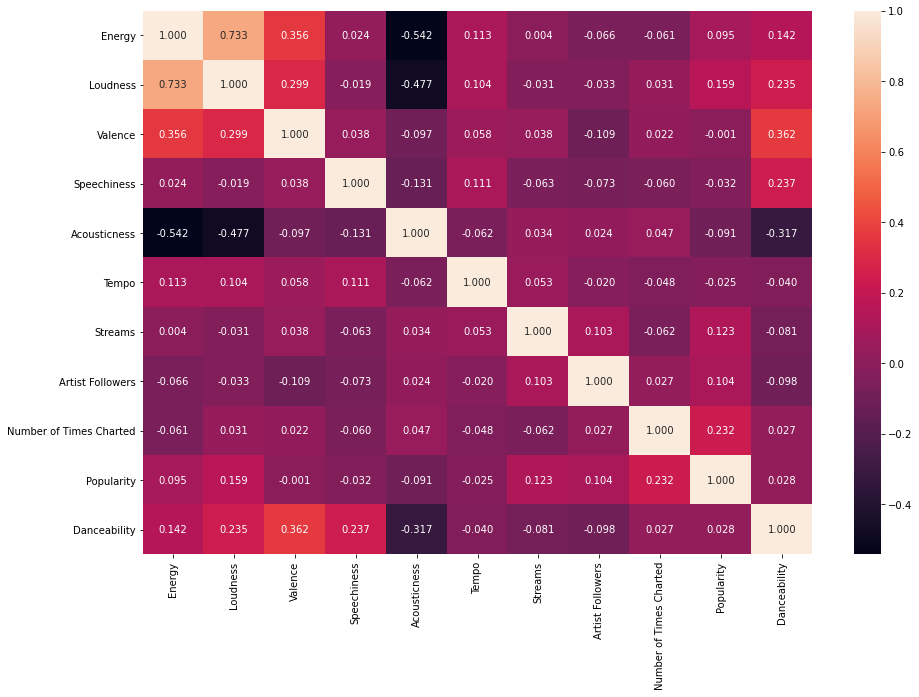

In [11]:
plt.figure(figsize=(15,10))

sns.heatmap(subdata.drop(columns=target).corr(), annot=True, fmt= '.3f')

plt.savefig(fname = "./5.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 4. Build a Bayesian network for chosen set of variables. Choose its structure on the basis of multivariate analysis and train distributions in nodes using chosen algorithm.


In [49]:
! pip install plotly==5.4.0

In [50]:
! pip install pgmpy

In [12]:
import math
# from pomegranate import *

import networkx as nx

import plotly.graph_objects as go

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference import VariableElimination
from pgmpy.base import DAG

In [52]:
subdata[targets].columns

Index(['Popularity', 'Danceability', 'Highest Charting Position'], dtype='object')

In [53]:
subdata.columns

Index(['Energy', 'Loudness', 'Valence', 'Speechiness', 'Acousticness', 'Tempo',
       'Streams', 'Artist Followers', 'Number of Times Charted', 'Popularity',
       'Danceability', 'Highest Charting Position'],
      dtype='object')

In [54]:
targets

['Popularity', 'Danceability', 'Highest Charting Position']

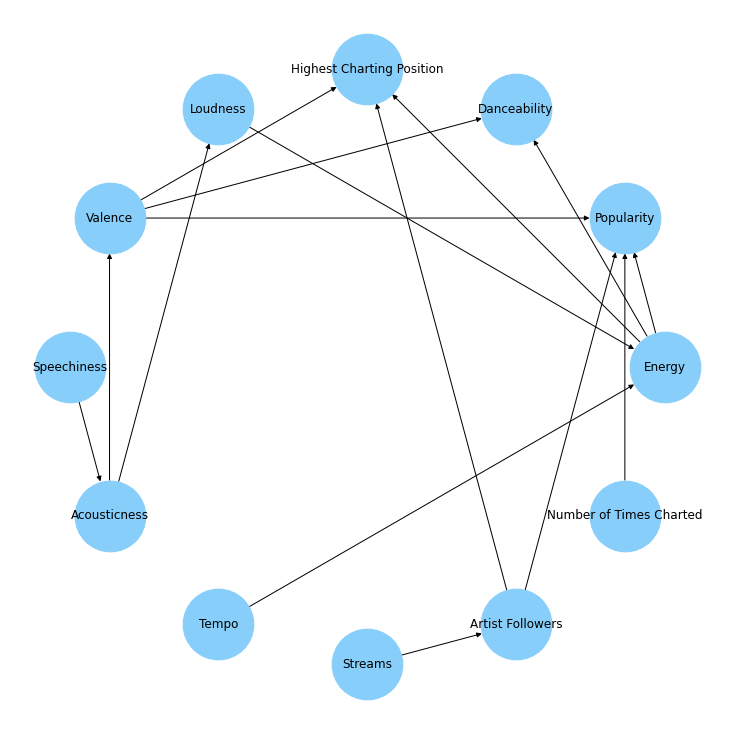

In [21]:
graph = nx.DiGraph()

for p in predictors: 
    graph.add_edge(p,targets[0])
    graph.add_edge(p,targets[1])
    graph.add_edge(p,targets[2])
graph.add_edge('Loudness','Energy')
graph.add_edge('Acousticness','Energy')
graph.add_edge('Acousticness','Loudness')
graph.add_edge('Acousticness','Loudness')
graph.add_edge('Tempo','Energy')
graph.add_edge('Energy','Danceability')
graph.add_edge('Acousticness','Valence')

graph.remove_edge('Streams','Popularity')
graph.remove_edge('Streams','Danceability')

graph.remove_edge('Artist Followers','Danceability')

graph.remove_edge('Number of Times Charted','Danceability')
graph.remove_edge('Acousticness','Energy')
graph.remove_edge('Acousticness','Popularity')
graph.remove_edge('Loudness','Popularity')
graph.remove_edge('Tempo','Popularity')
graph.remove_edge('Loudness','Danceability')
graph.remove_edge('Loudness','Highest Charting Position')
graph.add_edge('Speechiness','Acousticness')
graph.remove_edge('Speechiness','Highest Charting Position')
graph.remove_edge('Speechiness','Popularity')
graph.remove_edge('Speechiness','Danceability')
graph.remove_edge('Acousticness','Danceability')
graph.remove_edge('Tempo','Danceability')

graph.remove_edge('Acousticness','Highest Charting Position')
graph.add_edge('Streams','Artist Followers')
graph.remove_edge('Streams','Highest Charting Position')
graph.remove_edge('Number of Times Charted','Highest Charting Position')
graph.remove_edge('Tempo','Highest Charting Position')

plt.figure(figsize=(10,10))
# nx.draw_networkx(graph,pos=nx.circular_layout(graph))
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)
model_param = BayesianModel(graph)

plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


In [22]:
from sklearn.preprocessing import KBinsDiscretizer

transformed_data = subdata.copy()
bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = bins.fit_transform(subdata.values)

In [23]:
data_discrete = pd.DataFrame(data_discrete,columns=subdata.columns,index=subdata.index)
data_discrete

,Energy,Loudness,Valence,Speechiness,Acousticness,Tempo,Streams,Artist Followers,Number of Times Charted,Popularity,Danceability,Highest Charting Position
0,4.0,4.0,3.0,0.0,1.0,2.0,4.0,0.0,0.0,4.0,3.0,0.0
1,4.0,3.0,2.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,2.0,0.0
2,3.0,4.0,3.0,1.0,2.0,4.0,4.0,0.0,1.0,4.0,1.0,0.0
3,4.0,4.0,3.0,0.0,0.0,2.0,4.0,4.0,0.0,4.0,4.0,0.0
4,3.0,3.0,4.0,0.0,0.0,3.0,3.0,0.0,0.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,3.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0
1552,4.0,4.0,3.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,4.0
1553,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,3.0,4.0
1554,2.0,3.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,4.0,4.0


In [58]:
# data_discrete = data_discrete[:100]
data_discrete

,Energy,Loudness,Valence,Speechiness,Acousticness,Tempo,Streams,Artist Followers,Number of Times Charted,Popularity,Danceability,Highest Charting Position
0,4.0,4.0,3.0,0.0,1.0,2.0,4.0,0.0,0.0,4.0,3.0,0.0
1,4.0,3.0,2.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,2.0,0.0
2,3.0,4.0,3.0,1.0,2.0,4.0,4.0,0.0,1.0,4.0,1.0,0.0
3,4.0,4.0,3.0,0.0,0.0,2.0,4.0,4.0,0.0,4.0,4.0,0.0
4,3.0,3.0,4.0,0.0,0.0,3.0,3.0,0.0,0.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,3.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0
1552,4.0,4.0,3.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,4.0
1553,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,3.0,4.0
1554,2.0,3.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,4.0,4.0


In [32]:
# Fitting the model using Maximum Likelihood Estimator

from pgmpy.estimators import MaximumLikelihoodEstimator

# mle = MaximumLikelihoodEstimator(model=model, data=data_discrete)

# Estimating the CPD for a single node.
# for t in targets: print(mle.estimate_cpd(node=t))
# model_param.fit(data_discrete)
from pgmpy.estimators import BayesianEstimator
# est = BayesianEstimator(model_param, data_discrete)

model_param.fit(data_discrete, estimator=MaximumLikelihoodEstimator) # default equivalent_sample_size=5
# for cpd in model_param.get_cpds():
#     print(cpd)
# # Estimating CPDs for all the nodes in the model
# mle.get_parameters()[:10] # Show just the first 10 CPDs in the output

## Step 5. Build a Bayesian network for the same set of variables but using 2 chosen algorithms for structural learning.

In [25]:
from pgmpy.estimators import HillClimbSearch, K2Score, BicScore

hc_search = HillClimbSearch(data=data_discrete)
model_k2 = hc_search.estimate(scoring_method=K2Score(data_discrete))

  0%|          | 13/1000000 [00:01<37:41:18,  7.37it/s]


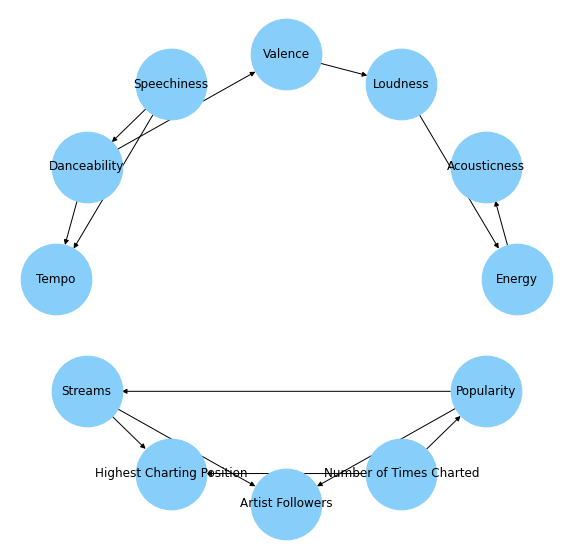

In [26]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(model_k2.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.savefig(fname = "./7.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

Building tree: 100%|██████████| 66/66.0 [00:00<00:00, 448.59it/s]


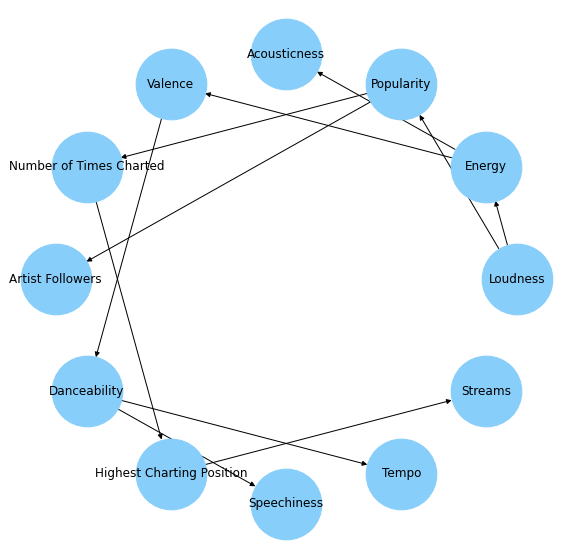

In [27]:
from pgmpy.estimators import TreeSearch

est = TreeSearch(data_discrete, root_node='Loudness')
model = est.estimate(estimator_type='chow-liu')

figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(model.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 6. Analyze a quality of sampled target variables from the point of view of problem statement (e.g. prediction, gap filling, synthetic generation).


In [28]:
def sampling (bn: DAG, data: pd.DataFrame, n: int = 100):
    bn_new = BayesianModel(bn.edges())
    bn_new.fit(data)
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n)
    return sample

In [29]:
def plot_comparative_hist(data1,data2, title=None, xlabel=None, ylabel='Probability', kde=True,hist=True,figsize=(10,10)):
    plt.figure(figsize=figsize)
    m = 1 + 3.32*np.log10(len(data1))
    m = int(np.round(m))
    if hist:
        data1.hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue',alpha=0.5, linewidth=3,label='Original data')
        data2.hist(density=True,stacked=True,bins=m,facecolor='red', edgecolor='maroon',label='Generated data',alpha=0.5, linewidth=3)
        
    if kde:
        kernel = scipy.stats.gaussian_kde(data1)
        min_amount, max_amount = data1.min(), data1.max()
        x = np.linspace(min_amount, max_amount, len(data1))
        kde_values = kernel(x)
        plt.plot(x,kde_values)

        kernel = scipy.stats.gaussian_kde(data2)
        min_amount, max_amount = data2.min(), data2.max()
        x = np.linspace(min_amount, max_amount, len(data2))
        kde_values = kernel(x)
        plt.plot(x,kde_values)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [33]:
sample_K2 = sampling(model_k2, data_discrete, data_discrete.shape[0])
sample_Tree = sampling(model, data_discrete, data_discrete.shape[0])
sample_our = sampling(model_param, data_discrete, data_discrete.shape[0])
# sample_BDeu = sampling(BDeuScore_model_bl, transformed_data, transformed_data.shape[0])

Generating for node: Popularity: 100%|██████████| 12/12 [00:00<00:00, 70.47it/s]


In [36]:
sample_K2 = bins.inverse_transform(sample_K2.values) 
sample_Tree = bins.inverse_transform(sample_Tree.values) 
sample_our = bins.inverse_transform(sample_our.values)

In [37]:
sample_K2 = pd.DataFrame(sample_K2,columns=subdata.columns,index=subdata.index)
# sample_K2

In [41]:
data_inv = bins.inverse_transform(data_discrete.values)
data_inv = pd.DataFrame(data_inv,columns=subdata.columns,index=subdata.index)


In [38]:
sample_Tree = pd.DataFrame(sample_Tree,columns=subdata.columns,index=subdata.index)
# sample_Tree

In [39]:
sample_our = pd.DataFrame(sample_our,columns=subdata.columns,index=subdata.index)


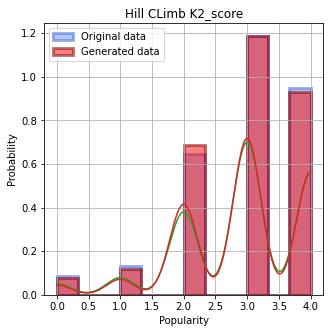

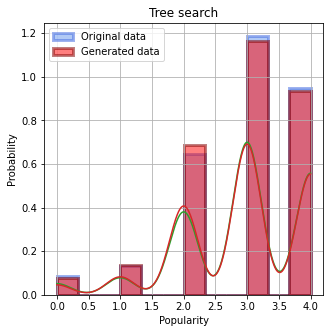

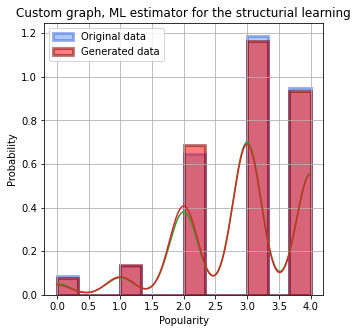

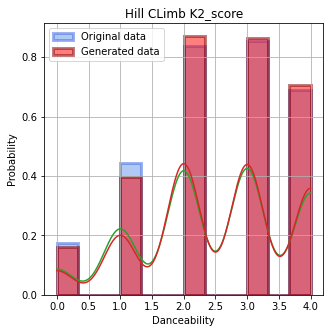

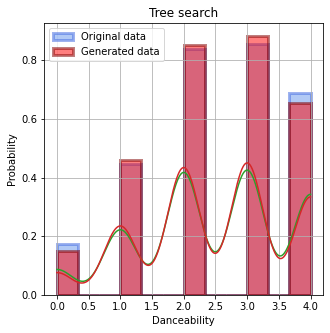

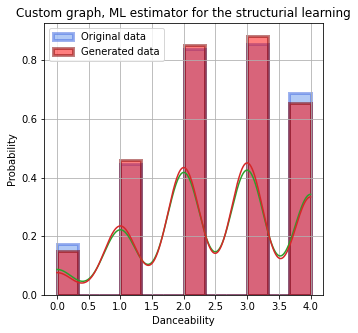

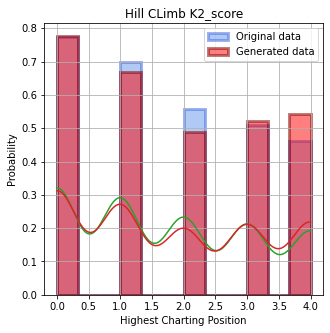

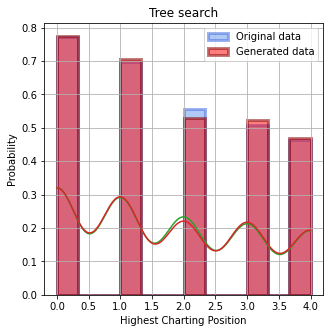

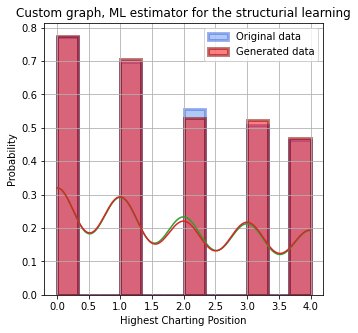

In [35]:
figsize = (5,5)
for t in targets:
    plot_comparative_hist(data_discrete[t],sample_K2[t],title='Hill CLimb K2_score',xlabel=t,figsize=figsize)
    plt.savefig(fname = "./9"+t+".png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
    plot_comparative_hist(data_discrete[t],sample_Tree[t],title='Tree search',xlabel=t,figsize=figsize)
    plt.savefig(fname = "./10"+t+".png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
    plot_comparative_hist(data_discrete[t],sample_Tree[t],title='Custom graph, ML estimator for the structurial learning',xlabel=t,figsize=figsize)
    plt.savefig(fname = "./11"+t+".png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


